# Imports

In [16]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Create train data

The competition was multioutput

We turn it into a binary toxic/ no-toxic classification

In [69]:
df = pd.read_csv("data/train.csv")

In [70]:
df = df.dropna()

In [71]:
df

,id,comment_text,toxicity
0,0,fuck you you self righteous creep,3
1,1,stop stop the goddam vandalism or there ll be...,2
2,2,i agree rt does have a few shortcomings but i...,0
3,3,if you would like verfiability here is the lin...,0
4,4,do you think there s consensus for me to be on...,0
...,...,...,...
34642,34642,huy i am kyle robbins i think albert pujols is...,4
34643,34643,unlike the ancient greeks the idiot who bloc...,4
34644,34644,no it isn t so if you wish to delete my accou...,1
34645,34645,you haven t been paying attention i don t c...,1


In [73]:
df = df.rename(columns={'toxicity': 'y', 'comment_text':'text'})
df.sample(5)

,id,text,y
11711,11711,come to my house right now and do me in the bu...,1
18902,18902,you know what fine fuck you i hope you and ...,3
34543,34543,oh just the wiktionary gwlardy is being del...,0
11644,11644,hahaha able i should answer you promptly somet...,0
15411,15411,speedy deletion of nottingham youth theatre ...,0


<AxesSubplot:>

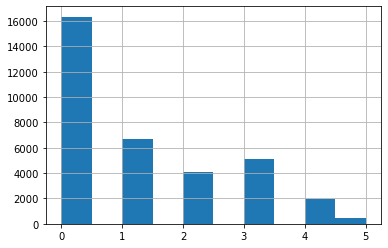

In [74]:
df['y'].hist()

## Undersample

In [75]:
df['y'].value_counts(normalize=True)

0    0.471800
1    0.193240
3    0.148127
2    0.118051
4    0.055764
5    0.013017
Name: y, dtype: float64

In [76]:
df['y'].value_counts()

0    16346
1     6695
3     5132
2     4090
4     1932
5      451
Name: y, dtype: int64

# TF-IDF

In [23]:
vec = TfidfVectorizer()

In [24]:
X = vec.fit_transform(df['comment_text'])
X

<34646x61711 sparse matrix of type '<class 'numpy.float64'>'
	with 1214988 stored elements in Compressed Sparse Row format>

In [78]:
df_val = pd.read_csv("data/test.csv")
X_val = vec.transform(df_val['comment_text'])

# Fit Model

In [88]:
model = MultinomialNB()
model.fit(X, df['y'])

MultinomialNB()

In [89]:
p1 = model.predict_proba(X_val)
y_pred = np.argmax(p1, axis=-1)
df_val['prediction'] = y_pred

<AxesSubplot:>

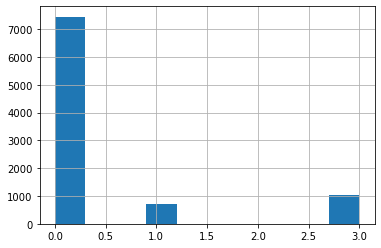

In [90]:
df_val['prediction'].hist()

## SGDRegressor

In [111]:
from sklearn.linear_model import SGDRegressor
mSGDRegressor = SGDRegressor()
mSGDRegressor.fit(X, df['y']/5)

SGDRegressor()

# Validate

In [112]:
p = mSGDRegressor.predict(X_val)

In [136]:
y_pred = np.minimum(np.maximum(0, np.floor(p*5).astype(int)), 5)

In [138]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([5331, 2695,  724,  289,  112,   43]))

# Submission

In [139]:
df_val['prediction'] = y_pred

In [140]:
df_val[['id', 'prediction']].to_csv('submission.csv', index=False)